#  Импорт


In [ ]:
import numpy as np # библиотека Numpy для операций линейной алгебры и прочего
import pandas as pd # Библиотека Pandas для работы с табличными данными
import matplotlib.pyplot as plt # библиотека Matplotlib для визуализации
from matplotlib.colors import ListedColormap # функция библиотеки Matplotlib, которая генерирует цветовую карту

from sklearn.datasets import make_moons, make_circles, make_classification # генерируемые наборы данных


если **не** хотите рисунки на темном фоне **не** выполняйте следующую ячейку

In [ ]:
plt.style.use('dark_background')

# Данные

Наши старые друзья / знакомые


In [ ]:
def plot_data(ax,ds,name='',marker = 'o',colors =("#FF0000", '#0000FF'),alpha=0.7, s = 150, facecolor=True):
    """Визуализация двумерных  данных для классификации
    Входные переменные:
    ===========
    ax: отдельная ячейка объекта figure
    ds: набор данных, содержащий признаки X и целевые метки y
    name: название графика
    marker: тип маркера - по умолчанию просто круги
    colors: цвета, которые будут использоваться для раскраски разных классов - по умолчанию Красный и Синий
    alpha: прозрачность маркеров
    s: размер маркера (~ квадрат радиуса)
    facecolor:
    """

    X, y = ds # распаковываем признаки и целевые метки в отдельные переменные

    cm_bright = ListedColormap(colors) # формируем цветовую карту из наших цветов
    ax.set_title(name, fontsize = 30) # прописываем название графика
    if facecolor: # если переменная задана - то просто рисуем скатерограмму по признакам с использованием параметров маркеров
        ax.scatter(X[:, 0], X[:, 1],
                   marker = marker, c=y,
                   cmap=cm_bright,s = s,
                   alpha =alpha)
    else: # иначе так же рисуем скатерограмму, но без
        ax.scatter(X[:, 0], X[:, 1],
                   marker = marker, c=y,
                   cmap=cm_bright,s = s,
                   facecolor = 'None',
                   alpha =alpha)
    # немного красоты и ля аккуратности
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5 # фиксируем минимальные и максимальные значения по горизонтали
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5 # фиксируем минимальные и максимальные значения по вертикали
    ax.grid(True)
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())

In [ ]:
def make_binary_clf(N, method = 'line',
                    noises = 0.15,
                    random_state = 42):
    """Создание синтетического набора данных
    для бинарной классификации
    Входные переменные:
    ===========
    N: количество точек
    method: тип набора данных
    noises: коэффициент ~ сила шума
    random_state: фиксированный сид случайных чисел (для повторяемости)
    """
    # фиксируем случайный seed
    if random_state: rng = np.random.RandomState(seed = random_state)

    if method == 'line' or method is None:
        # если выбран метод line (или никакой не задан)
        # то мы создаем набор данных с использованием функции make_classification
        # это будут линейно-разделимые данные
        X, y = make_classification(n_samples=N, # количество точек
                                   n_features=2, # количество признаков
                                   n_redundant=0, # количество бесполезных признаков
                                   n_informative=2,# количество информативных признаков
                                   n_clusters_per_class=1, # количество групп точек на класс
                                   class_sep=2, # количество классов
                                   random_state=random_state # фиксированный сид случайных чисел
                                   )
        X += np.random.randn(*X.shape) *noises # добавляем к признакам случайный шум

    elif method == 'moons':
        # если выбран метод moons
        # то мы создаем набор данных с использованием функции make_moons
        # это будут данные похожие на Инь-Ян
        X, y = make_moons(n_samples=N, # количество точек
                          noise=noises, # уровень шума
                          random_state=random_state # фиксированный сид случайных чисел
                          )

    elif method == 'circles':
        # если выбран метод circles
        # то мы создаем набор данных с использованием функции make_circles
        # это будут данные в виде концентрических окружностей
        X, y = make_circles(n_samples=N, # количество точек
                            noise=noises, # уровень шума
                            factor=0.5, # соотношение радиусов внуренней и внешней окружности
                            random_state=random_state # фиксированный сид случайных чисел
                            )


    return X,y

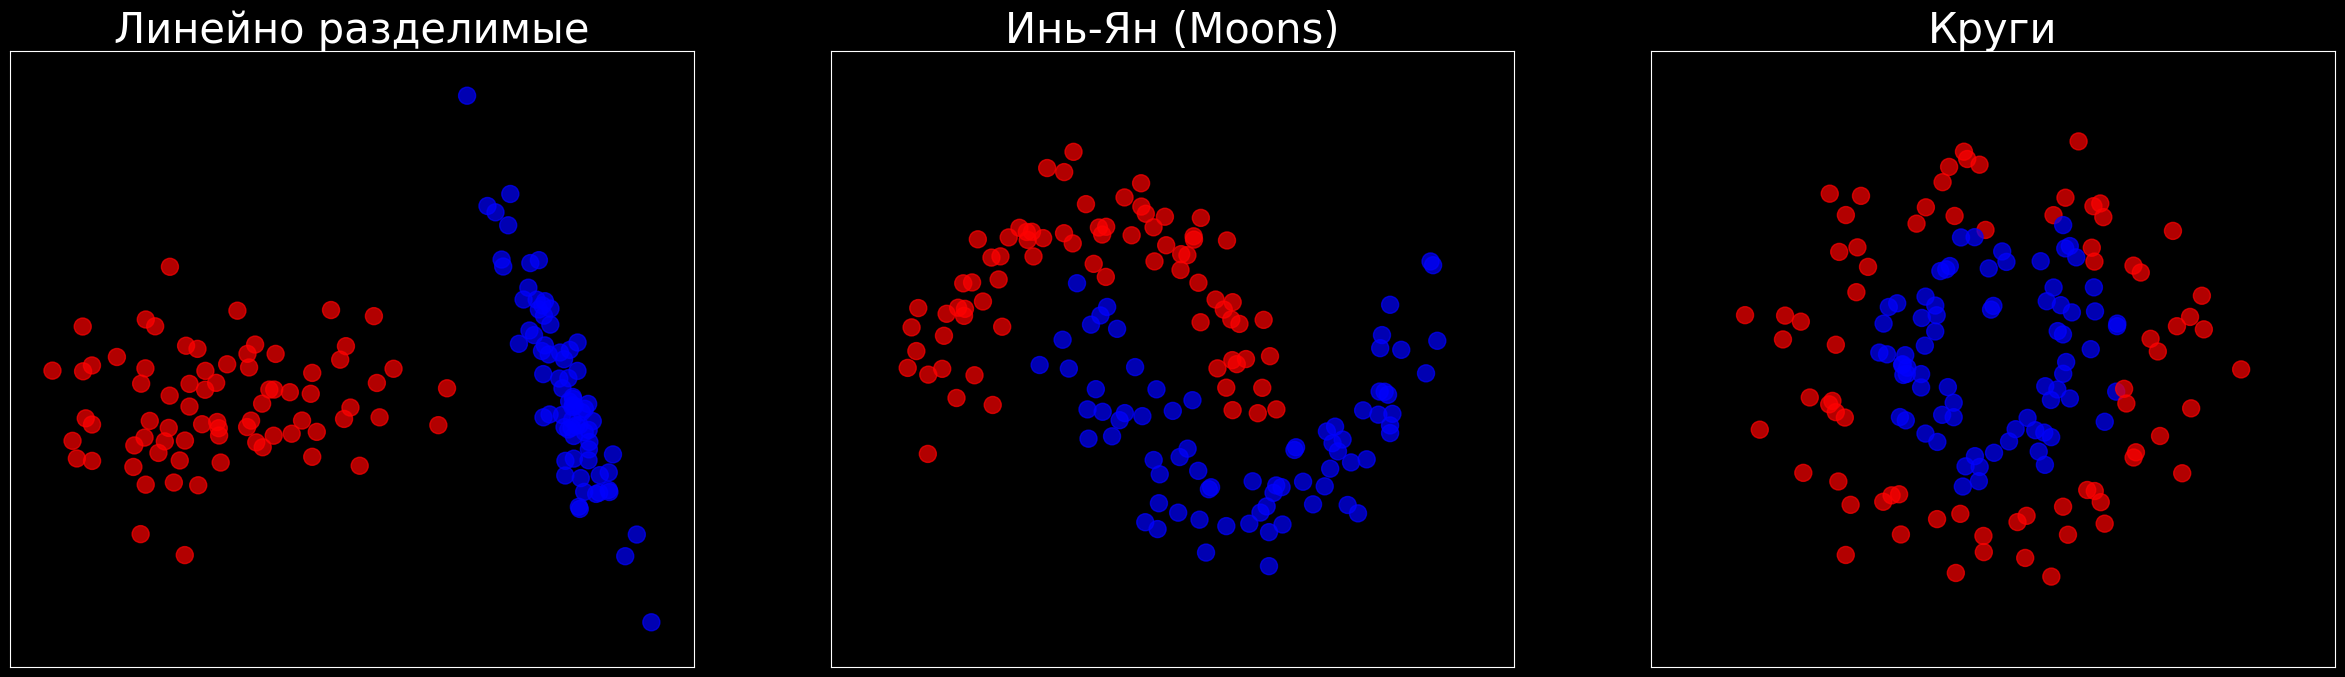

In [ ]:
#@title данные { run: "auto" }
N = 150 #@param {type:"slider", min:50, max:250, step:25}
noises = 0.15 #@param {type:"slider", min:0, max:1, step:0.05}

fig=plt.figure(figsize=(30,8))

ax = plt.subplot(1, 3, 1)
plot_data(ax,make_binary_clf(N,method = 'line',
                             noises = noises),
          'Линейно разделимые')
ax = plt.subplot(1, 3, 2)
plot_data(ax,make_binary_clf(N,method = 'moons',
                             noises = noises),
          'Инь-Ян (Moons)')
ax = plt.subplot(1, 3, 3)
plot_data(ax, make_binary_clf(N,method = 'circles',
                              noises = noises),
          'Круги')




За не имением лучшего аналога тестировать алгоритмы кластеризации будем на тех же наборах, что и классификацию

# Кластеризация k-средних

В ряде случаев при анализе данных оказывается так, что про данные ничего не известно, однако хочется понять на сколько они однородны или, например, могут быть разделены на группы. Такие группы можно назвать кластерами. Задача разделения на кластеры не требует наличия учителя. Другими словами, мы пытаемся найти закономерности в данных как таковых без привязки к тому, какие результаты для них мы хотим получить.<br>

 Одним из самых простых методов кластеризации является метод k-средних.
Суть данного метода сводится к тому, чтобы найти заданное число кластеров (k) и их центры (т.н. центроиды) таких, чтобы расстояние от центроидов до всех точек кластера было минимальным.

Алгоритм k-средних может быть описан следующим образом <ul>
<li>выбирается к случайным точкам - центроиды.
<li>рассчитывается вектор расстояние между каждой точкой набора данных и каждым центроидом.
<li>в каждый кластер записываются те точки для которых оказалось, что для соответствующего центроида расстояние меньше, чем для других.
<li>новые значение центроидов рассчитываются как среднее значение по всем точкам кластера.


Начнем, по традиции с простых данных - линейно разделимых

In [ ]:
N = 150
X,y = make_binary_clf(N,method = 'line', noises=0.05, )

X.shape

(150, 2)

In [ ]:
X

array([[ 1.81773704,  2.38662593],
       [ 1.42600166,  3.56801052],
       [-2.45958794,  2.08171664],
       [-3.92891782,  1.4971571 ],
       [-3.69452455,  1.52057458],
       [ 1.63573233,  3.03004405],
       [ 2.36426493,  1.1635325 ],
       [-2.66178732,  0.99529996],
       [ 2.4034482 ,  1.1301468 ],
       [ 1.20997397,  4.24760651],
       [ 1.71521774,  2.65036561],
       [ 1.12225838,  4.06192742],
       [ 0.6465628 ,  5.5706503 ],
       [ 1.12156515,  4.07448518],
       [-1.60338714,  2.42033175],
       [ 1.57923531,  2.83591448],
       [-0.97670225,  1.79789164],
       [ 1.51686691,  3.29586648],
       [-0.73268281,  2.57239397],
       [ 2.37141283,  1.0287082 ],
       [ 2.36635571,  1.02119217],
       [ 1.75610443,  2.55900187],
       [ 1.7684001 ,  2.46409931],
       [ 2.14102622,  1.60624816],
       [ 2.60432492,  0.39785445],
       [-2.51674565,  0.21359393],
       [-3.86680777,  2.44470181],
       [-2.21883083,  1.29822467],
       [ 2.06484013,

Рассчитаем расстояние через функции

С возможностью выбора метрики

In [ ]:
def distance(X1, X2, metric = 'euclidean', p = 2):
    """ Оценка расстояния
    Входные переменные:
    ===========
    X1: первый вектор / матрица векторов
    X2: второй вектор / матрица векторов
    metric: тип метрики расстояния
    p: степень для Метрики минковского
    """
    # тут как "по формулам из учебника"
    if metric == 'euclidean':
        # Эвклидово расстояние это корень из суммы квадратов разностей
        dist = np.sqrt(np.sum(np.square(X1 - X2).T,axis=0))
    if metric == 'cityblock':
        # Манхеттонское расстояние это сумма модулей разностей
        dist = np.sum(np.abs(X1 - X2).T,axis=0)
    if metric == 'Chebyshev':
        # расстояние Чебышева это максимум из модулей разностей
        dist = np.max(np.abs(X1 - X2).T,axis=0)
    if metric == 'Minkowski':
        # расстояние Минковского это корень p-ой степени из суммы разностей в степени p
        dist = np.power(np.sum(np.power(np.abs(X1 - X2),p).T,axis=0),1/p)
    return dist # возвращает 1 число, если ищем расстояние между векторами
    # и несколько чисел, если векторов несколько

Проведем несколько тестов, функция работает как с векторами, так и матрицами равной размерности.

In [ ]:
X[:5]

array([[ 1.81773704,  2.38662593],
       [ 1.42600166,  3.56801052],
       [-2.45958794,  2.08171664],
       [-3.92891782,  1.4971571 ],
       [-3.69452455,  1.52057458]])

In [ ]:
X[10:15]

array([[ 1.71521774,  2.65036561],
       [ 1.12225838,  4.06192742],
       [ 0.6465628 ,  5.5706503 ],
       [ 1.12156515,  4.07448518],
       [-1.60338714,  2.42033175]])

Посмотрим на различные варианты использования

In [ ]:
print(distance(X[0], X[1],metric = 'cityblock')) # расстояние между двумя векторами (0-ая и 1-ая точка)
print(distance(X[:5], X[10:15])) # расстояние между двумя группами из 5 векторов (с 0 по 4, и с 10 по 14)
print(distance(X[0], X[10:15])) # расстояние между вектором и группой из 5 векторов (0-й вектор, и с 10 по 14)

1.5731199635739992
[0.28296436 0.57983953 4.67127718 5.67009686 2.27649261]
[0.28296436 1.81392548 3.39258902 1.82579411 3.42129022]


Посмотрим на одних данных как будут показывать себя различные метрики расстояния

In [ ]:
metrics = ['euclidean','cityblock','Chebyshev','Minkowski']

Перебирем их все и проверим для определения расстояния между двумя векторами (0-ая и 1-ая точка)

In [ ]:
for metric in metrics:
    print(distance(X[0], X[1],metric = metric, p = 10))

1.244638965121171
1.5731199635739992
1.1813845906960498
1.1813864891629715


## Шаг 0

Инициализация к-центров

Прежде чем проводить кластеризацию необходимо проинициализировать центры кластеров.<br>
Для этого выберем случайные индексы среди доступных в наборе данных.

In [ ]:
def init_centroids(X, n_clusters, random_state = 42):
    """Инициализация центроидов
    Входные переменные:
    ===========
    X: признаки
    n_clusters: ожидаемое количество кластеров
    random_state: фиксированный сид случайных чисел (для повторяемости)
    """
    if random_state: rng = np.random.seed(random_state) # фиксируем случайный seed
    # выбираем n_clusters случайных индексов из диапазона от 0 до количества точек в даннных
    centroid_idxs = np.random.randint(0, X.shape[0], size = n_clusters)
    return X[centroid_idxs,:] # центры кластеров - точки с выбранными индексами


посмотрим как это работает для двух кластеров

In [ ]:
n_clusters = 2
centroids = init_centroids(X, n_clusters)
print(centroids)

[[-2.40047863  2.32672376]
 [ 1.8437327   2.51201681]]


## Шаг 1 и Шаг 2

Проведем первую кластеризацию. Для этого возьмем каждый центроид и посчитаем расстояние от него до все записей набора данных. <br>
Индексы значений для каждого кластера выберем как индексы минимальных расстояний до соответствующего центроида. <br>
Таким образом, нулевой кластер будет включать те точки набора данных, в которых расстояние до нулевого центроида меньше, чем до первого центроида.

In [ ]:
def predict(X, n_clusters, centroids, metric = 'euclidean', p = 2):
    """Предсказание кластера
    Входные переменные:
    ===========
    X: признаки
    n_clusters: ожидаемое количество кластеров
    centroids: текущие центры кластеров
    metric: тип метрики расстояния
    p: степень для Метрики минковского
    """
    # заполняем матрицу расстояний нулями. размерность матрицы число точек на число кластеров
    distances = np.zeros((X.shape[0], n_clusters))
    # перибираем каждый центроид
    for i, centr in enumerate(centroids):
        distances[:,i] = distance(centr,X, metric, p)#расчитываем расстояние от центра до всех точек
        # используем ранее написанную функцию поиска расстояний
    cluster_label = np.argmin(distances,axis = 1) # находим ближайший центр для каждой точки
    return cluster_label, distances # возвращаем метки кластеров и матрицу расстояний

посмотрим как распределились результаты кластеризации

Для этого напишем функцию (чтобы не повторятся)

In [ ]:
def plot_cluster(X,centroids, cluster_label, centroids_label, old_centroids = None, old_centroids_label = None):
    """Визуализация кластера
    Входные переменные:
    ===========
    X: признаки
    centroids: текущие центры кластеров
    cluster_label: метки кластеров для признаков
    centroids_label: метки для текущих центров кластеров
    old_centroids: предыдущие центры кластеров
    old_centroids_label: метки для предыдущих центров кластеров
    """
    fig = plt.figure(figsize=(11,10)) # Создаем полотно
    # Визуализируем наши признаки
    plt.scatter(X[:, 0], X[:, 1],
                c = cluster_label, cmap = 'bwr',
                s=100,alpha = 0.6)
    # Визуализируем текущие центры кластеров. Как точки, но побольше
    plt.scatter(centroids[:, 0], centroids[:, 1],
                c = centroids_label, cmap = 'bwr',
                s=400, edgecolors = 'k')

    if old_centroids is not None: # если хотим визуализировать предыдущие центры кластеров
        # их отрисуем поменьше, чем текущие центры, но больше чем "рядовые точки"
        plt.scatter(old_centroids[:, 0], old_centroids[:, 1],
            c = old_centroids_label, cmap = 'bwr',
            s=200, edgecolors = 'k')

    plt.xticks([])
    plt.yticks([])



* Сгенерируем начальные центроиды
* Оценим метки кластеров для начальных центроидов
* Визуализируем результат



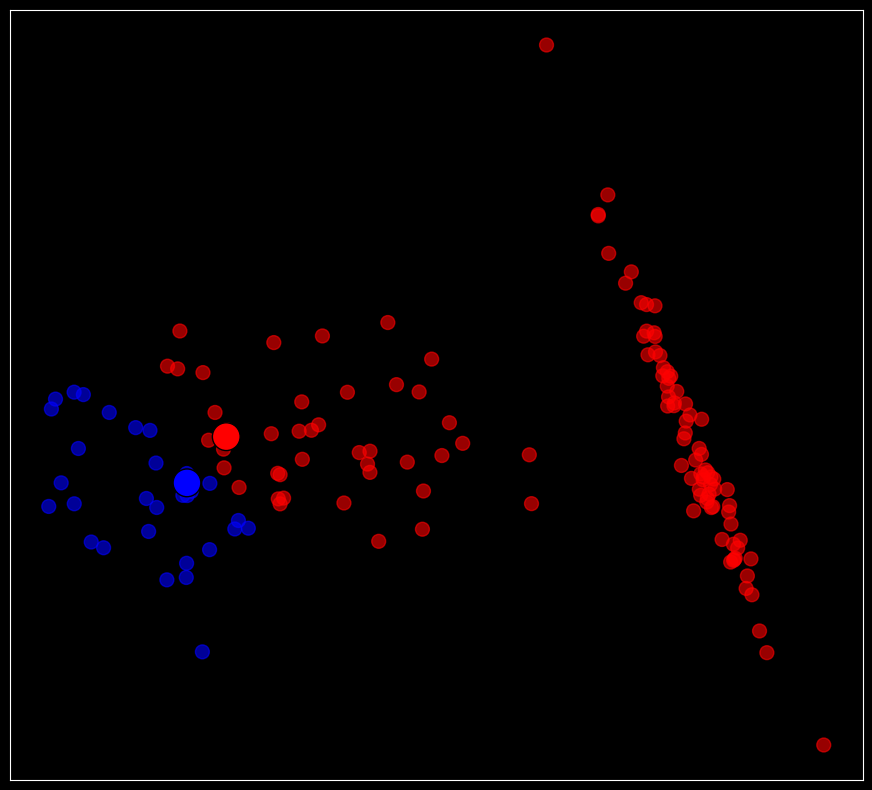

In [ ]:
centroids = init_centroids(X, n_clusters, random_state=32)

cluster_label, distances=predict(X, n_clusters, centroids)
centroids_label = [0,1]

plot_cluster(X,centroids,
             cluster_label, centroids_label,)

## Шаг 3

Теперь выберем новые центроиды, как среднея точка по кластеру

 для этого нам понадобиться выбрать каждый кластер по отдельности

In [ ]:
old_centroids = np.copy(centroids)

for k in range(n_clusters): # перебираем все кластеры
    c_idxs = np.flatnonzero(cluster_label==k) #берем индексы тек точек, которые принадлежат к класетру k
    centroids[k] = X[c_idxs].mean(axis = 0) # считаем среднего представителя для кластера

Визуализируем результат

Покажем и старые, и новые центроиды

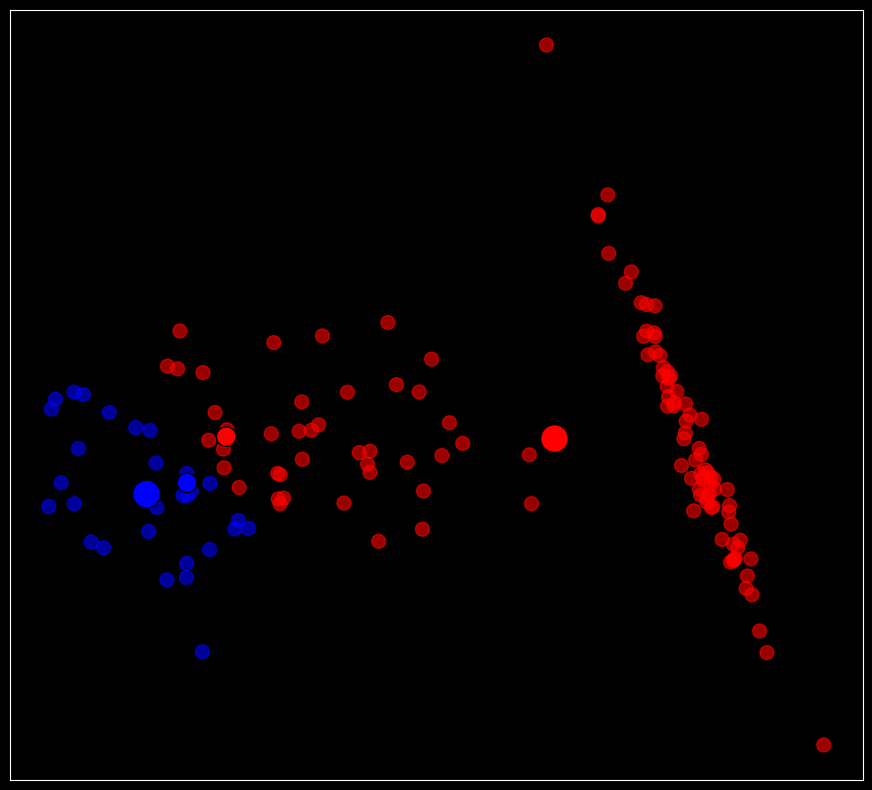

In [ ]:
plot_cluster(X,centroids,
             cluster_label, centroids_label,
             old_centroids, centroids_label)

Рассчитаем относительное расстояние между старыми и новыми центроидами. Если расстояние между обновленными центроидами будет сравнительно небольшим - то есть центроиды перестанут менять позицию, то мы будем считать что кластеризация закончена.

In [ ]:
def delta_centroids(centroids,old_centroids, metric = 'euclidean', p = 2):
    """Оценка изменений положения центров кластеров
    Входные переменные:
    ===========
    centroids: текущие центры кластеров
    old_centroids: предыдущие центры кластеров
    old_centroids_label: метки для предыдущих центров кластеров
    metric: тип метрики расстояния
    p: степень для Метрики минковского
    """
    # используем функцию расстояния для оценки изменения смещений центров кластеров
    return (distance(centroids,old_centroids, metric, p)/distance(old_centroids, np.mean(old_centroids), metric, p)).mean()

delta_centroids(centroids,old_centroids)

0.5439968229157969

Попробуем создать процедуры итерационной кластеризации. В кноце процедуры выведем результирующий номер итерации и расстояние между кластерами

In [ ]:
def fit(X, n_clusters, centroids, max_iter=10, tol=0.01, metric = 'euclidean', p = 2):
    """Обучение кластеризации к-средних
    Входные переменные:
    ===========
    X: признаки
    n_clusters: ожидаемое количество кластеров
    centroids: текущие центры кластеров
    max_iter: максимальное количество итераций алгоритма К-Средних
    tol: порог изменения расстояния
    metric: тип метрики расстояния
    p: степень для Метрики минковского
    """
    dcentr = np.inf # пусть вначале разница между изменениями положения - некое большое число

    for i in range(max_iter): #  делаем до max_iter итераций алгоритма

        old_centroids = np.copy(centroids) # текущие центры становятся стапыми
        cluster_label,_=predict(X, n_clusters, centroids, metric, p) # предсказываем метки кластеров

        # считаем новые центры кластеров как средние точки по кластерам
        for k in range(n_clusters):
            c_idxs = np.flatnonzero(cluster_label==k)
            centroids[k] = X[c_idxs].mean(axis = 0)
        # оцениваем относительное изменение центроидов
        dcentr = delta_centroids(centroids,old_centroids, metric, p)
        # если изменение меньше порога - закончим раньше
        if dcentr<=tol:
            break

    print('Мы остановились на итерации:', i,', относительное изменение центроидов: ',dcentr)

    return cluster_label # возвращаем финальные метки кластеров

проверим и визуализируем результаты:

In [ ]:
cluster_label = fit(X, n_clusters, centroids, max_iter=100, tol=0.001)

Мы остановились на итерации: 4 , относительное изменение центроидов:  0.0


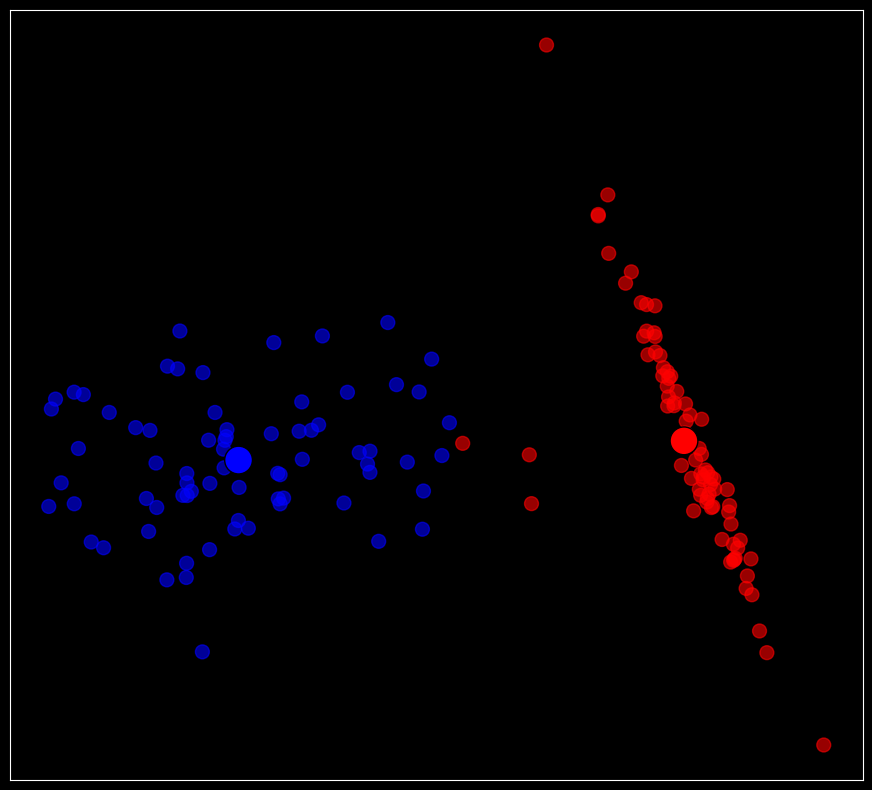

In [ ]:

plot_cluster(X,centroids,
             cluster_label, centroids_label,)

выглядит правдоподобно

# ООП

Как обычно объеденим все наши наработки в один класс

In [ ]:
class KMeans():
    def __init__(self,n_clusters = 2, centroids = None,
                 max_iter=10, tol=0.01,
                 metric = 'euclidean', p = 2,
                 random_state = None):
        self.n_clusters = n_clusters
        self.centroids  = centroids
        self.max_iter   = max_iter
        self.tol        = tol
        self.iters      = None
        self.inertia = None
        self.metric = metric
        self.p  = p
        self.random_state  = random_state
    #-------------------------------------
    def distance(self,X1, X2):
        # оценка расстояния
        if self.metric == 'euclidean':
            dist = np.sqrt(np.sum(np.square(X1 - X2).T,axis=0))
        if self.metric == 'cityblock':
            dist = np.sum(np.abs(X1 - X2).T,axis=0)
        if self.metric == 'Chebyshev':
            dist = np.max(np.abs(X1 - X2).T,axis=0)
        if self.metric == 'Minkowski':
            dist = np.power(np.sum(np.power(np.abs(X1 - X2),self.p).T,axis=0),1/self.p)
        return dist
    #-------------------------------------
    def init_centroids(self, X):
        # инициализация первых центров кластеров
        if self.random_state: rng = np.random.seed(self.random_state)
        c_idxs = np.random.randint(0, X.shape[0], size = self.n_clusters)
        return X[c_idxs,:]
    #-------------------------------------
    def predict(self, X):
        # оценка пренадлежности точек к кластеру по расстоянию
        distances = np.zeros((X.shape[0], self.n_clusters))

        for i,centr in enumerate(self.centroids):
            distances[:,i] = self.distance(centr,X)
        self.inertia = np.sum(np.power(np.min(distances,axis = 1),2))
        return np.argmin(distances,axis = 1)
    #-------------------------------------
    def transform(self,X):
        # получение предсказаний
        return self.predict(X)
    #-------------------------------------
    def delta_centroids(self,old_centroids):
        # оценка относительного изменения центров кластеров
        return (
                self.distance(self.centroids,old_centroids)/
                self.distance(old_centroids, np.mean(old_centroids))
               ).mean()
    #-------------------------------------
    def fit(self, X):
        # обучение - несколько итераций алгоритма к-Средних
        if self.centroids is None: # если центры кластеров не заданы - задаем
            self.centroids = self.init_centroids(X)

        d_centrs = np.inf

        for i in range(self.max_iter):

            old_centroids = np.copy(self.centroids)

            cluster_label = self.predict(X)

            for k in range(self.n_clusters):

                c_idxs = np.flatnonzero(cluster_label==k)

                self.centroids[k] = X[c_idxs].mean(axis = 0)

            d_centrs = self.delta_centroids(old_centroids)

            self.iters = i
            if d_centrs<=self.tol:
                break
        return self
    #-------------------------------------
    def fit_transform(self, X):
        # и обучаем и сразу выдаем метки кластеров
        return self.fit(X).predict(X)



Протестируем наш полученный класс

Для этого попытаемся использовать метод локтя для оценки оптимального числа кластеров

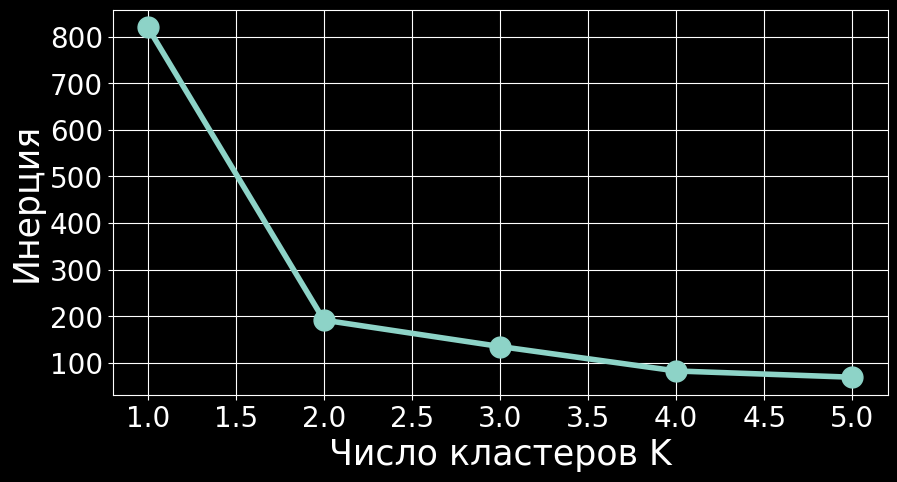

In [ ]:
sse = [] # здесь будем хранить инерции для конкретных к
list_k = list(range(1, 6))
for k in list_k: # тестируем различные к в диапазоне от 1 до 5
    km = KMeans(n_clusters=k)# создаем объект кластеризации с заданным к
    km.fit(X) # обучаем
    sse.append(km.inertia) # фиксируем текущую инерцию

# визуализируем метод локтя. ниже используется много раз встречающаяся визуализация
plt.figure(figsize=(10, 5))
plt.plot(list_k, sse, '-o',
         linewidth = 4, markersize = 15)
plt.xlabel('Число кластеров K', fontsize = 25)
plt.ylabel('Инерция', fontsize = 25)

plt.grid();
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20);

Посмотрим для 2 кластеров (т.к. 2 больше похожа на локоть)

По слегка модифицированной стандартной схеме

* Создаем модель-объект

* Обучаем  и извлекаем метки кластеров через `.fit_transform()`

* Визуализируем

Мы остановились на итерации:: 2


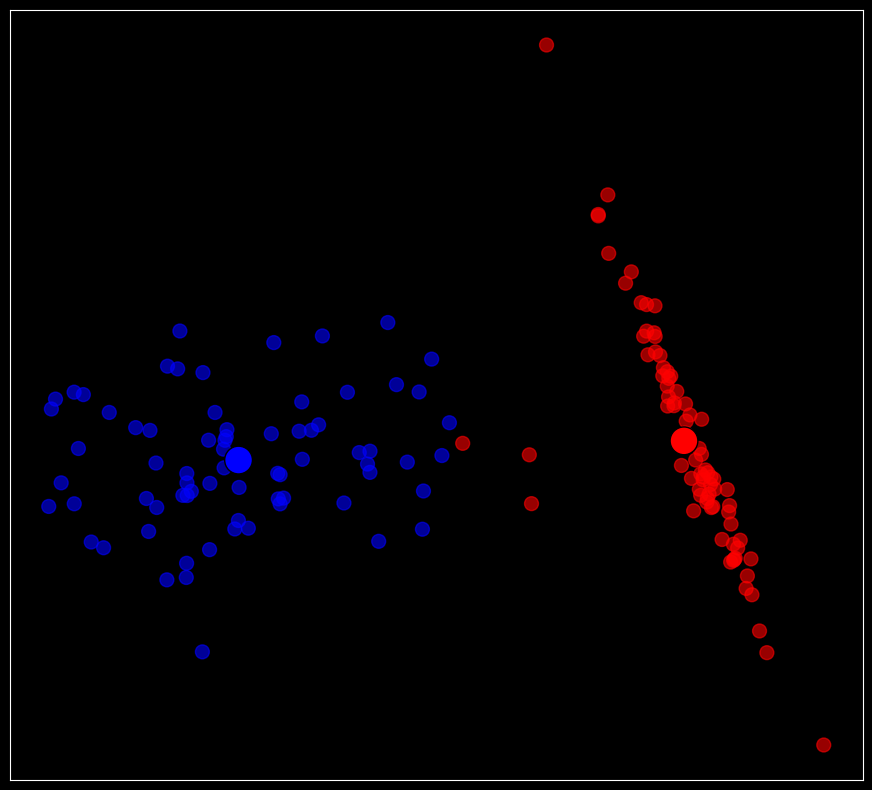

In [ ]:
kmeans   = KMeans(n_clusters=2,max_iter=100, tol=0.01, random_state= 42) # создаем объект
c_labels = kmeans.fit_transform(X) # обучаем и сразу складываем метки кластеров

print('Мы остановились на итерации::',kmeans.iters)

# визуализируем
plot_cluster(X,kmeans.centroids,
             c_labels, np.unique(c_labels),)

Посмотрим для 4 кластеров (чтобы визуально понять, что "что-то не то")

Уже привычные для нас шаги

* Создаем модель-объект

* Обучаем  и извлекаем метки кластеров через `.fit_transform()`

* визуализируем

Мы остановились на итерации:: 1


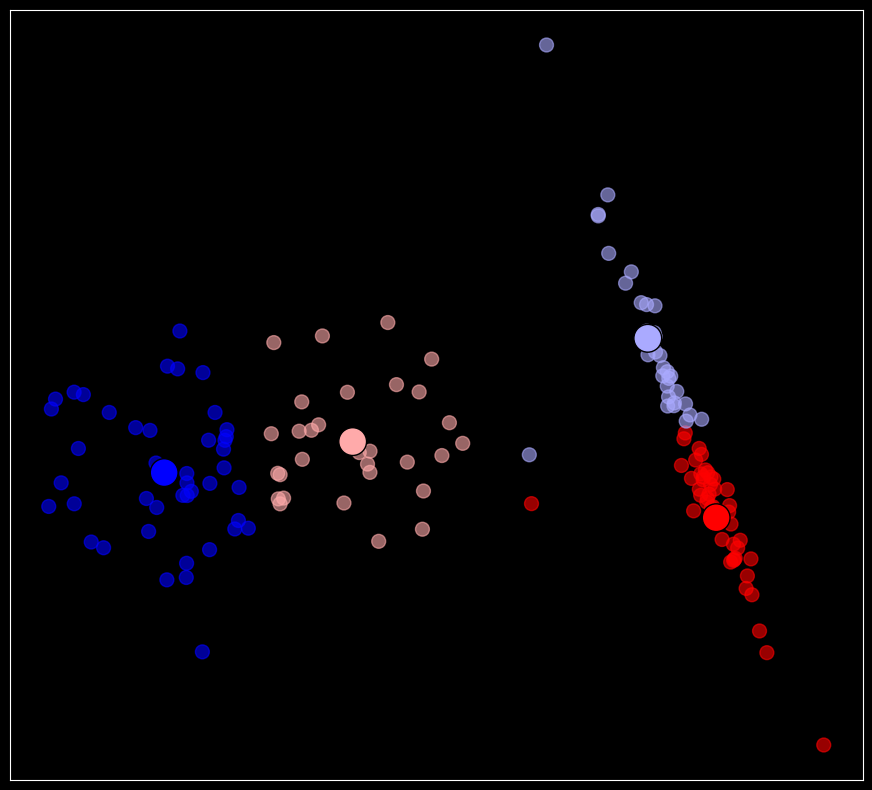

In [ ]:
kmeans   = KMeans(n_clusters=4,max_iter=100, tol=0.01, random_state= 42)
c_labels = kmeans.fit_transform(X)

print('Мы остановились на итерации::',kmeans.iters)


plot_cluster(X,kmeans.centroids,
             c_labels, np.unique(c_labels),)

Видно что стало кучней

## Немного о метриках

Перед тем как считать метрики нужно понять, каким образом распределены метки кластеров

Для этого подходит функция из библиотеки pandas crosstab

Задаем правильные метки класстеров (если они у нас есть, иначе можем использовать категориальные переменные для оценки связи номеров кластеров с ними) и полученные метки кластеров



In [ ]:
pd.crosstab(y,c_labels, rownames=['Метки'], colnames = ['Предсказания'])

Предсказания,0,1,2,3
Метки,,,,
0,43,1,30,1
1,0,32,0,43


По этой таблице видно, что 0-й и 2-й кластер связаны с 0-ой меткой

А 1-ый и 3-ий кластер - с 1-ой меткой